In [3]:
import os
os.chdir("../")
from data_processing import gamry_eis as geis
from data_processing import arbin_lbt
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload

In [18]:
geis = reload(geis)

In [3]:
# Load eis into objects
T10_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'
T15_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T15V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'

channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)
eis_cells = []
for channel_idx, channel in enumerate(channel_numbers):
    cycle = 1
    eis_cycles = []
    while cycle <= 46:
        eis_sweep = geis.EisSweep(f'cycle{cycle}', 0.5)

        try:
            if cycle <= 23:
                file_prepath = T10_file_prepath
            if cycle > 23:
                file_prepath = T15_file_prepath
            if cycle < 10 and channel < 10:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA')
            elif cycle < 10 and channel < 100:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle00{cycle}_Step014.DTA')
            elif cycle < 100 and channel < 10:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle0{cycle}_Step014.DTA')
            elif cycle < 100 and channel < 100:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle0{cycle}_Step014.DTA')
            else:
                print('Cycle number greater than 100!')

            eis_cycles.append(geis.EisCycle(cycle, [eis_sweep], f'cycle_object_{cycle}'))
            cycle += 2

        except FileNotFoundError:
            cycle += 2
            print(f'Warning... File B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA doesn\'t exist!')
        
        

    eis_cells.append(geis.EisCell(
        f'channel{channel}', 
        eis_cycles, 
        cell_number=cell_numbers[channel_idx], 
        channel_number=channel)
        )
    eis_cycles = []

Warning... File B6T10V0_Chan0011_Cycle0035_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0037_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0039_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0041_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0043_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0045_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0047_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0035_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0037_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0039_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0041_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0043_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0045_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0047_Step014.DTA doesn't exist!


In [ ]:
# Get cell temperatures and soh's for EIS each cycle
cell_builder = arbin_lbt.CellBuilder()
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'
arbin_cells = []
for channel_idx, channel in enumerate(channel_numbers):
    print(f'Processing channel {channel}')
    folder_name = f'B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_{channel}/'
    arbin_cells.append(arbin_lbt.ArbinCell(cell_numbers[channel_idx], channel))
    directory = os.fsencode(raws_prepath+folder_name)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith('.csv'):
            cell_builder.read_B6_csv_data(
                arbin_cells[channel_idx],
                raws_prepath+folder_name+filename, 
                {'characterization': [10,13,14]}
                )

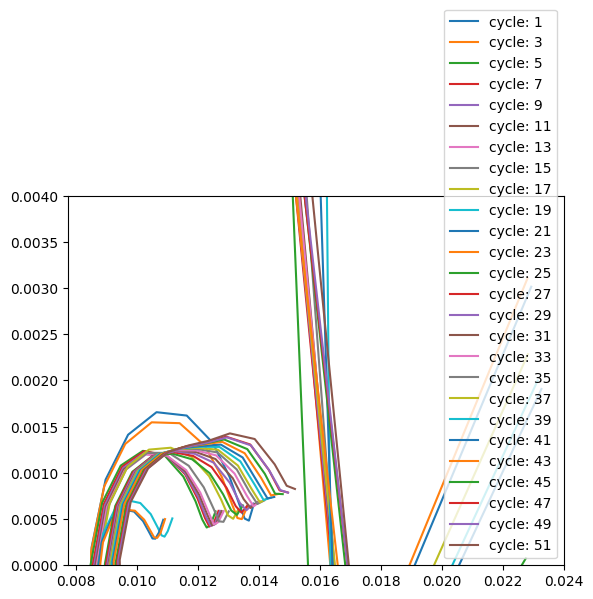

In [51]:
for cycle_number, cycle in enumerate(eis_cells[0]):
    for sweep in cycle:
        plt.plot(sweep.z_real, -1*np.array(sweep.z_imag), label=f'cycle: {1+(cycle_number)*2}')
# plt.xlim([0, 0.016])
plt.ylim([0, 0.004])
plt.legend()
plt.show();

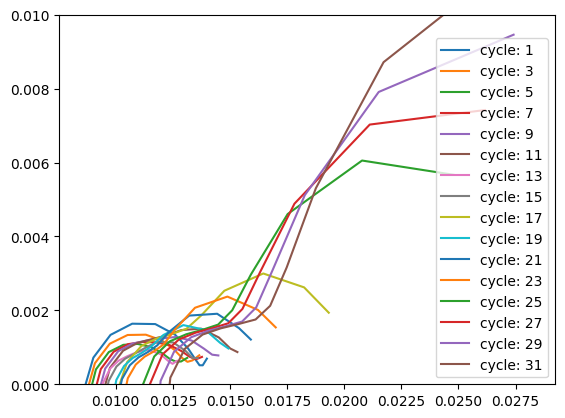

In [10]:
cell = [cell for cell in eis_cells if cell.channel_number == 16]
for cycle_number, cycle in enumerate(cell[0]):
    for sweep in cycle:
        plt.plot(sweep.z_real, -1*np.array(sweep.z_imag), label=f'cycle: {1+(cycle_number)*2}')
# plt.xlim([0, 0.016])
plt.ylim([0, 0.010])
plt.legend()
plt.show();

In [11]:
arbin_lbt = reload(arbin_lbt)

In [4]:
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'
folder_name = 'B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_1/'
test_number = 10

cell_builder = arbin_lbt.CellBuilder()
cell1 = arbin_lbt.ArbinCell(4, 4)
file_count = 1
while file_count < 15:
    if file_count > 8:
        folder_name = 'B6T15V0_1_2_3_4_9_10_11_12_13_14_15_16/Channel_1/'
        test_number = 15
    file_name = f'B6T{test_number}V0_1_2_3_4_9_10_11_12_13_14_15_16_Channel_1.{file_count}.csv'
    cell_builder.read_B6_csv_data(cell1, raws_prepath+folder_name+file_name, {'characterization': [28]})
    file_count += 1

Processing test cycle 1
Processing test cycle 2
Processing test cycle 3
Processing test cycle 4
Processing test cycle 5
Processing test cycle 6
Processing test cycle 7
Processing test cycle 8
Processing test cycle 9
Processing test cycle 10
Processing test cycle 11
Processing test cycle 12
Processing test cycle 13
Processing test cycle 14
Processing test cycle 15
Processing test cycle 16
Processing test cycle 17
Processing test cycle 18
Processing test cycle 19
Processing test cycle 20
Processing test cycle 21
Processing test cycle 22
Processing test cycle 23
Processing test cycle 24
Processing test cycle 25
Processing test cycle 29
Processing test cycle 30
Processing test cycle 31
Processing test cycle 32
Processing test cycle 33
Processing test cycle 34
Processing test cycle 35
Processing test cycle 36
Processing test cycle 37
Processing test cycle 38
Processing test cycle 39
Processing test cycle 40
Processing test cycle 41
Processing test cycle 42
Processing test cycle 43
Processin

In [14]:
cell1.headers

['Date_Time',
 'Test_Time(s)',
 'Step_Time(s)',
 'Step_Index',
 'Cycle_Index',
 'Voltage(V)',
 'Current(A)',
 'Charge_Capacity(Ah)',
 'Discharge_Capacity(Ah)',
 'Charge_Energy(Wh)',
 'Discharge_Energy(Wh)',
 'ACR(Ohm)',
 'Internal Resistance(Ohm)',
 'dV/dt(V/s)',
 'Battery_Temperature(C)']

In [7]:
for step in cell1[5]:
    for time in step["Date_Time"]:
        if time.endswith('05:34:55.050'):
            print(step.step_index)
            df = step.get_data_as_dataframe()
df
    

28


,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s),Battery_Temperature(C)
0,11/18/2021 05:23:45.051,2099509.552,5.0017,28,5,3.94927597,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,-1.0252E-05,33.8358345
1,11/18/2021 05:23:50.050,2099514.551,10.0007,28,5,3.948986769,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,-6.58035E-05,33.83767319
2,11/18/2021 05:23:55.051,2099519.553,15.0018,28,5,3.948822021,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,-5.24521E-06,33.81785202
3,11/18/2021 05:24:00.051,2099524.553,20.0021,28,5,3.948718071,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,1.90735E-05,33.82791519
4,11/18/2021 05:24:05.050,2099529.551,25.0007,28,5,3.948611498,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,-3.02792E-05,33.84405899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,11/18/2021 05:43:25.051,2100689.553,1185.0019,28,5,3.946101427,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,3.21865E-05,33.53796005
237,11/18/2021 05:43:30.049,2100694.551,1190,28,5,3.946161985,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,2.93255E-05,33.56112671
238,11/18/2021 05:43:35.050,2100699.552,1195.0014,28,5,3.946135044,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,-2.86102E-05,33.53001085
239,11/18/2021 05:43:40.050,2100704.552,1200.001,28,5,3.946093559,0,1.600303173,1.12284E-05,6.137807846,3.68214E-05,,0,-2.59876E-05,33.52574158


In [3]:
max_new_capacity = 4.2 # Ah
# for cell_idx, cell in enumerate(arbin_cells):
for cycle in cell1:    
    for step in cycle:
        if step.step_index == 16:
            # eis_cells[cell_idx][]
            print(f'Cycle: {cycle.cycle_index}')
            print(f'Step Number: {step.step_index}')
            print(f'Step Temp: {step["Battery_Temperature(C)"][-1]}')
            print(f'Step SOH: {float(step["Discharge_Capacity(Ah)"][-1])/max_new_capacity}')
            # print(f'Step final voltage: {step["Voltage(V)"][-1]}')
            print(f'Step Internal Resistance: {step["Internal Resistance(Ohm)"]}')
            print(f'Step Current: {step["Current(A)"]}')

Cycle: 1
Step Number: 16
Step Temp: 18.68690856
Step SOH: 0.9423995585714285
Step Internal Resistance: ['0.01215098']
Step Current: ['-1.277305603']
Cycle: 3
Step Number: 16
Step Temp: 18.66497494
Step SOH: 0.9228784697619047
Step Internal Resistance: ['0.01206049']
Step Current: ['-1.061084747']
Cycle: 5
Step Number: 16
Step Temp: 21.62028348
Step SOH: 0.9116108076190477
Step Internal Resistance: ['0.012492471']
Step Current: ['-1.039382935']
Cycle: 7
Step Number: 16
Step Temp: 21.49413945
Step SOH: 0.8999322142857142
Step Internal Resistance: ['0.012561059']
Step Current: ['-1.059886932']
Cycle: 9
Step Number: 16
Step Temp: 21.59550178
Step SOH: 0.8916473388095237
Step Internal Resistance: ['0.01256405']
Step Current: ['-0.981502533']
Cycle: 11
Step Number: 16
Step Temp: 21.67103088
Step SOH: 0.8839522657142856
Step Internal Resistance: ['0.012684776']
Step Current: ['-0.86366272']
Cycle: 13
Step Number: 16
Step Temp: 21.66074503
Step SOH: 0.8765508447619047
Step Internal Resistance:

In [23]:
step00 = cell1.cycles[0].steps[1].get_data_as_dataframe()
step00

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s),Battery_Temperature(C)
0,10/23/2021 07:20:56.000,61066.1699,40.6197,14,1,3.75953607,0,1.979080558,3.958078146,7.078522205,14.55306053,,0,1.04028E-05,18.71058508
